In [4]:
!unzip data/sample.zip

Archive:  data/sample.zip
   creating: sample/
  inflating: sample/10_left.jpeg     
  inflating: sample/10_right.jpeg    
  inflating: sample/13_left.jpeg     
  inflating: sample/13_right.jpeg    
  inflating: sample/15_left.jpeg     
  inflating: sample/15_right.jpeg    
  inflating: sample/16_left.jpeg     
  inflating: sample/16_right.jpeg    
  inflating: sample/17_left.jpeg     
  inflating: sample/17_right.jpeg    


In [5]:
!unzip data/sampleSubmission.csv.zip

Archive:  data/sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    


In [6]:
!dir sample

10_left.jpeg   13_left.jpeg   15_left.jpeg   16_left.jpeg   17_left.jpeg
10_right.jpeg  13_right.jpeg  15_right.jpeg  16_right.jpeg  17_right.jpeg


In [7]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit


/home/dingo/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


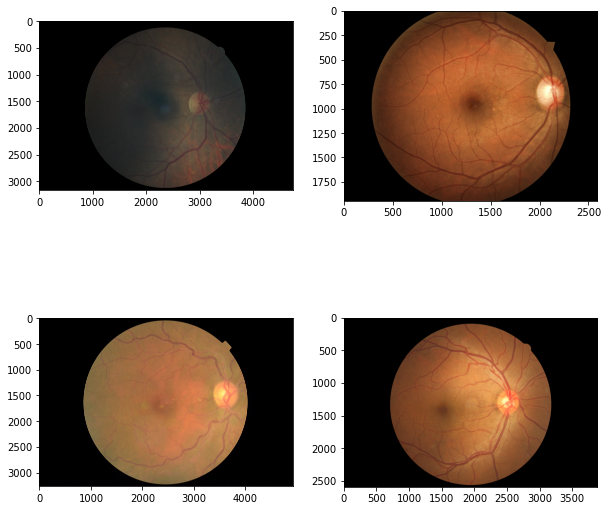

In [8]:
f, axarr = plt.subplots(2,2, figsize=(10, 10))
axarr[0,0].imshow(Image.open("./sample/10_right.jpeg"))
axarr[0,1].imshow(Image.open("./sample/13_right.jpeg"))
axarr[1,0].imshow(Image.open("./sample/15_right.jpeg"))
axarr[1,1].imshow(Image.open("./sample/17_right.jpeg"))

NUM DATA : 5000
NUM CLASSES : 5
CLASS DIST : [3657, 354, 788, 108, 93]


<BarContainer object of 5 artists>

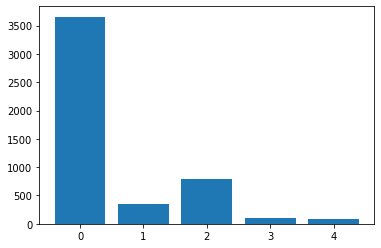

In [10]:
df = pd.read_csv("trainLabels.csv")[:5000]
df['image'] = df['image'].apply(lambda x: "../input/diabetic-retinopathy-resized/resized_train_cropped/resized_train_cropped/" + x + ".jpeg")
df.head()
num_classes = len(np.unique(df['level']))
class_dist = [len(df.loc[df['level'] == x]) for x in range(num_classes)]

print(f"NUM DATA : {len(df)}")
print(f"NUM CLASSES : {num_classes}")
print(f"CLASS DIST : {class_dist}")
plt.bar(np.unique(df['level']), class_dist)